# Project 2 - Ames Housing Data and Kaggle Challenge

## Executive Summary

- In this project, I was given a set of data for houses (~2000 training homes to be exact) in Ames, Iowa and a whole bunch of features (79 to be exact). My goal with this data was to clean it, and then create model that could be used to determine, or at least estimate house prices in Ames from these features.
- Following the creation of my model, I was then to apply it to a `testing.csv` data set where the SalePrice was unknown and submit it to Kaggle
- My best model had a RSME of 25,000

<a id ="Contents"></a>
### Contents:


- [Step 1: Imports & Data](#Step-1:-Imports-&-Data)
- [Step 2: EDA](#Step-2:-EDA)
- [Step 3: Feature Selection & Regression](#Step-3:-Feature-Selection-&-Regression)
- [Step 4: Apply to Test Data](#Step-4:-Apply-to-Test-Data)
- [Step 5: Conclusions and Recommendations](#Step-5:-Conclusions-and-Recommendations)

## Step 1: Imports & Data
<br>

[Back To Top](#Contents)

In [1]:
# Covering all our bases here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_regression
from sklearn.pipeline import Pipeline

import warnings
warnings.simplefilter(action='ignore')

%matplotlib inline

#### Read in actual data

In [2]:
df = pd.read_csv('datasets/train.csv')
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## Step 2: EDA

[Back To Top](#Contents)

#### Columns of Interest:

- Lot Area
- Street (dummyify) (Gravel vs Paved)
- Alley (dummyify) (Gravel, Paved, No Access)
- Lot Shape (Reg, IR1, IR2, IR3)
- Overall Qual (1 - 10, 10 is best)
- Overall Cond (1 - 10, 10 is best)
- Neighborhood
    - Lot of options, should dummmify and drop first
- Exter Qual
    - Po = Poor, Fa = Fair, TA = Average, Gd = Good, Ex = Excellent (Turn into 1-5)
- Exter Cond
    - Po = Poor, Fa = Fair, TA = Average, Gd = Good, Ex = Excellent (Turn into 1-5)
- Bsmt Qual
    - Po = Poor, Fa = Fair, TA = Average, Gd = Good, Ex = Excellent (Turn into 1-5), NA = No basement
- Bsmt Cond
    - Po = Poor, Fa = Fair, TA = Average, Gd = Good, Ex = Excellent (Turn into 1-5), NA = No basement
- HeatingQC
    - Po = Poor, Fa = Fair, TA = Average, Gd = Good, Ex = Excellent (Turn into 1-5)
- Central Air
    - N = No, Y = Yes
- 1st Flr SF
- 2nd Flr SF
- Low Qual Fin SF
- Bsmt Full Bath
- Bsmt Half Bath
- Full Bath
- Half Bath
- Bedroom
- Kitchen
- KitchenQual
    - Po = Poor, Fa = Fair, TA = Average, Gd = Good, Ex = Excellent (Turn into 1-5)
- Fireplaces
- Garage Type
    - NA = None, 2 Types = 2+ Garages, All others = 1 (Make into Function?)
- Garage Area
- Garage Qual
    - Po = Poor, Fa = Fair, TA = Average, Gd = Good, Ex = Excellent (Turn into 1-5), NA = No Garage
- Misc Val
- Total Bsmt SF
- Gr Liv Area






#### Notes on Columns
- From the above, in keeping with not having too many features, I'm going to list out the columns I want in a list, and clean those columns before proceeding
- Lot Area, Street, Alley, Overall Qual, Overall Cond, Neighborhood, Exter Qual, Exter Cond, Bsmt Qual, Bsmt Cond, HeatingQC, Central Air, 1st Flr SF, 2nd Flr SF, Fireplaces, Garage Type, Garage Area
- After a few more metrics, I'm going to go through each cleaning of the columns as needed

In [49]:
#Feature selection for df_test

features3 = ['Lot Area', 'Street', 'Alley', 'Overall Qual', 'Overall Cond', 'Neighborhood',
            'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC', 'Central Air',
            '1st Flr SF', '2nd Flr SF', 'Fireplaces', 'Garage Type', 'Garage Area', 'Total Bsmt SF', 'Gr Liv Area',
            'Kitchen Qual'] 

#Latest Model

features4 = ['SalePrice', 'Lot Area', 'Street', 'Alley', 'Overall Qual', 'Overall Cond', 'Neighborhood',
            'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC', 'Central Air',
            '1st Flr SF', '2nd Flr SF', 'Fireplaces', 'Garage Type', 'Garage Area', 'Total Bsmt SF', 'Gr Liv Area',
            'Kitchen Qual'] 

In [4]:
# Check and make sure what I put in matches our dataframe
features4

['SalePrice',
 'Lot Area',
 'Street',
 'Alley',
 'Overall Qual',
 'Overall Cond',
 'Neighborhood',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Heating QC',
 'Central Air',
 '1st Flr SF',
 '2nd Flr SF',
 'Fireplaces',
 'Garage Type',
 'Garage Area',
 'Total Bsmt SF',
 'Gr Liv Area',
 'Kitchen Qual']

In [5]:
df.shape

(2051, 81)

In [6]:
df.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [7]:
nulls = df.isnull().sum()
print(nulls[nulls > 0])

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64


- Below, I have cleaved the dataset into the features I just want to work with for my model, but can amend it as needed!

In [8]:
# This area here involved checking individual values but merged cells for ease of reading

df['Alley'].value_counts(dropna=False)

df['Bsmt Qual'].value_counts(dropna=False)

df['Bsmt Cond'].value_counts(dropna=False)

df['Garage Type'].value_counts(dropna=False)

df['Street'].value_counts(dropna=False)

Pave    2044
Grvl       7
Name: Street, dtype: int64

> Recall that several columns have qualitative listings from Poor to Excellent.
> Plan is to turn that to a 1-5 rating, and if it's N/A or Nan or NA etc...set that to 0
<br><br>
> Also, need to make numeric our `Central Air` column and dummyify `Street`, `Alley`, and convert the `Garage Type` column to my idea

In [9]:
# Qualityify function for the above
def qualityify(x):
    if x == 'Po':
        return 1
    elif x == 'Fa':
        return 2
    elif x == 'TA':
        return 3
    elif x == 'Gd':
        return 4
    elif x == 'Ex':
        return 5
    else:
        return 0
    
def garage_adj(x):
    if x == '2Types':
        return 2
    elif (x == 'Attchd' or x == 'Detchd' or x == 'BuiltIn' or x == 'Basment' or x == 'CarPort'):
        return 1
    else:
        return 0



#### Another Testing DataFrame

Here, I created a copy of the DataFrame with just the columns I wanted to look at, for easier displaying purposes

In [10]:
df4 = df[features4]
df4.head()

,SalePrice,Lot Area,Street,Alley,Overall Qual,Overall Cond,Neighborhood,Exter Qual,Exter Cond,Bsmt Qual,...,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Fireplaces,Garage Type,Garage Area,Total Bsmt SF,Gr Liv Area,Kitchen Qual
0,130500,13517,Pave,NaN,6,8,Sawyer,Gd,TA,TA,...,Ex,Y,725,754,0,Attchd,475.0,725.0,1479,Gd
1,220000,11492,Pave,NaN,7,5,SawyerW,Gd,TA,Gd,...,Ex,Y,913,1209,1,Attchd,559.0,913.0,2122,Gd
2,109000,7922,Pave,NaN,5,7,NAmes,TA,Gd,TA,...,TA,Y,1057,0,0,Detchd,246.0,1057.0,1057,Gd
3,174000,9802,Pave,NaN,5,5,Timber,TA,TA,Gd,...,Gd,Y,744,700,0,BuiltIn,400.0,384.0,1444,TA
4,138500,14235,Pave,NaN,6,8,SawyerW,TA,TA,Fa,...,TA,Y,831,614,0,Detchd,484.0,676.0,1445,TA


In [11]:
# Applying all the cleanup from the training set

# 0 - 5 Applications on these columns
df4['Exter Qual'] = df4['Exter Qual'].apply(qualityify)
df4['Exter Cond'] = df4['Exter Cond'].apply(qualityify)
df4['Bsmt Qual'] = df4['Bsmt Qual'].apply(qualityify)
df4['Bsmt Cond'] = df4['Bsmt Cond'].apply(qualityify)
df4['Heating QC'] = df4['Heating QC'].apply(qualityify)
df4['Kitchen Qual'] = df4['Kitchen Qual'].apply(qualityify)

# 0 - 2 Applications on this column
df4['Garage Type'] = df4['Garage Type'].apply(garage_adj)

# 0 - 1 Central Air
df4['Central Air'] = df4['Central Air'].map({'Y': 1, 'N': 0})

# Make some dummies out of these columns
df4 = pd.get_dummies(df4, prefix='Alley', drop_first=False, dummy_na=False, columns=['Alley'])
df4 = pd.get_dummies(df4, prefix='Street', drop_first=False, dummy_na=False, columns=['Street'])
df4 = pd.get_dummies(df4, prefix='Nghbrhd', drop_first=True, columns=['Neighborhood'])

# Purge few remaining nulls
df4.replace(np.nan, 0, inplace=True)



C:\Users\Rytas\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Rytas\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Rytas\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [12]:
df4.head()

,SalePrice,Lot Area,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Central Air,...,Nghbrhd_NoRidge,Nghbrhd_NridgHt,Nghbrhd_OldTown,Nghbrhd_SWISU,Nghbrhd_Sawyer,Nghbrhd_SawyerW,Nghbrhd_Somerst,Nghbrhd_StoneBr,Nghbrhd_Timber,Nghbrhd_Veenker
0,130500,13517,6,8,4,3,3,3,5,1,...,0,0,0,0,1,0,0,0,0,0
1,220000,11492,7,5,4,3,4,3,5,1,...,0,0,0,0,0,1,0,0,0,0
2,109000,7922,5,7,3,4,3,3,3,1,...,0,0,0,0,0,0,0,0,0,0
3,174000,9802,5,5,3,3,4,3,4,1,...,0,0,0,0,0,0,0,0,1,0
4,138500,14235,6,8,3,3,2,4,3,1,...,0,0,0,0,0,1,0,0,0,0


In [13]:
df4.isnull().sum().sum()

0

In [14]:
df4.columns

Index(['SalePrice', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Exter Qual',
       'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC', 'Central Air',
       '1st Flr SF', '2nd Flr SF', 'Fireplaces', 'Garage Type', 'Garage Area',
       'Total Bsmt SF', 'Gr Liv Area', 'Kitchen Qual', 'Alley_Grvl',
       'Alley_Pave', 'Street_Grvl', 'Street_Pave', 'Nghbrhd_Blueste',
       'Nghbrhd_BrDale', 'Nghbrhd_BrkSide', 'Nghbrhd_ClearCr',
       'Nghbrhd_CollgCr', 'Nghbrhd_Crawfor', 'Nghbrhd_Edwards',
       'Nghbrhd_Gilbert', 'Nghbrhd_Greens', 'Nghbrhd_GrnHill',
       'Nghbrhd_IDOTRR', 'Nghbrhd_Landmrk', 'Nghbrhd_MeadowV',
       'Nghbrhd_Mitchel', 'Nghbrhd_NAmes', 'Nghbrhd_NPkVill', 'Nghbrhd_NWAmes',
       'Nghbrhd_NoRidge', 'Nghbrhd_NridgHt', 'Nghbrhd_OldTown',
       'Nghbrhd_SWISU', 'Nghbrhd_Sawyer', 'Nghbrhd_SawyerW', 'Nghbrhd_Somerst',
       'Nghbrhd_StoneBr', 'Nghbrhd_Timber', 'Nghbrhd_Veenker'],
      dtype='object')

(48.0, 0.0)

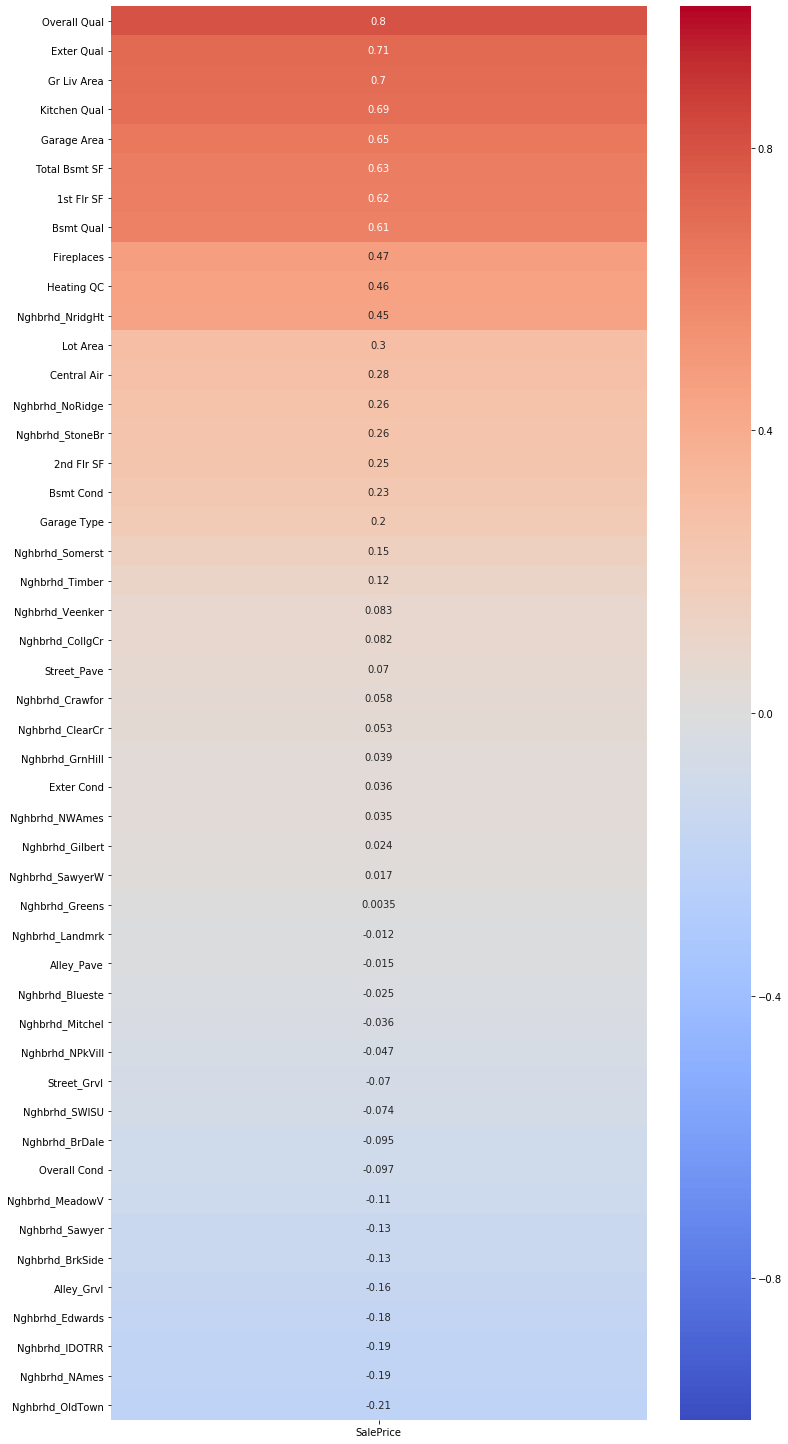

In [15]:
corrs2 = df4.corr()[['SalePrice']].drop(index='SalePrice').sort_values(by='SalePrice', ascending=False)

plt.figure(figsize=(12,26))
sns.heatmap(corrs2, annot=True, vmin=-1, vmax=1, cmap='coolwarm');
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

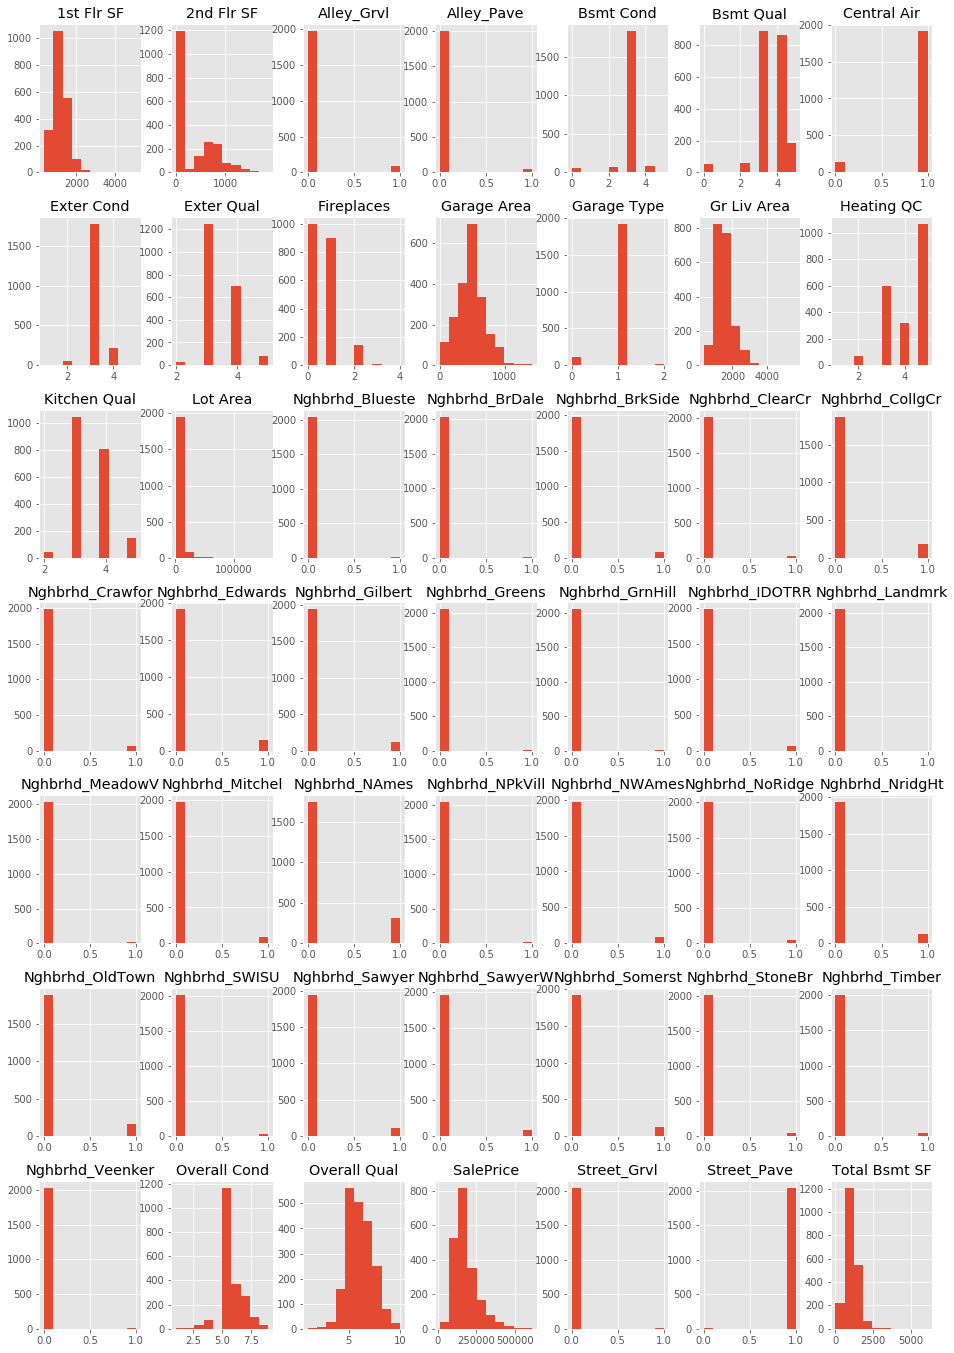

In [16]:
plt.style.use('ggplot')

df4.hist(figsize=(16,24));

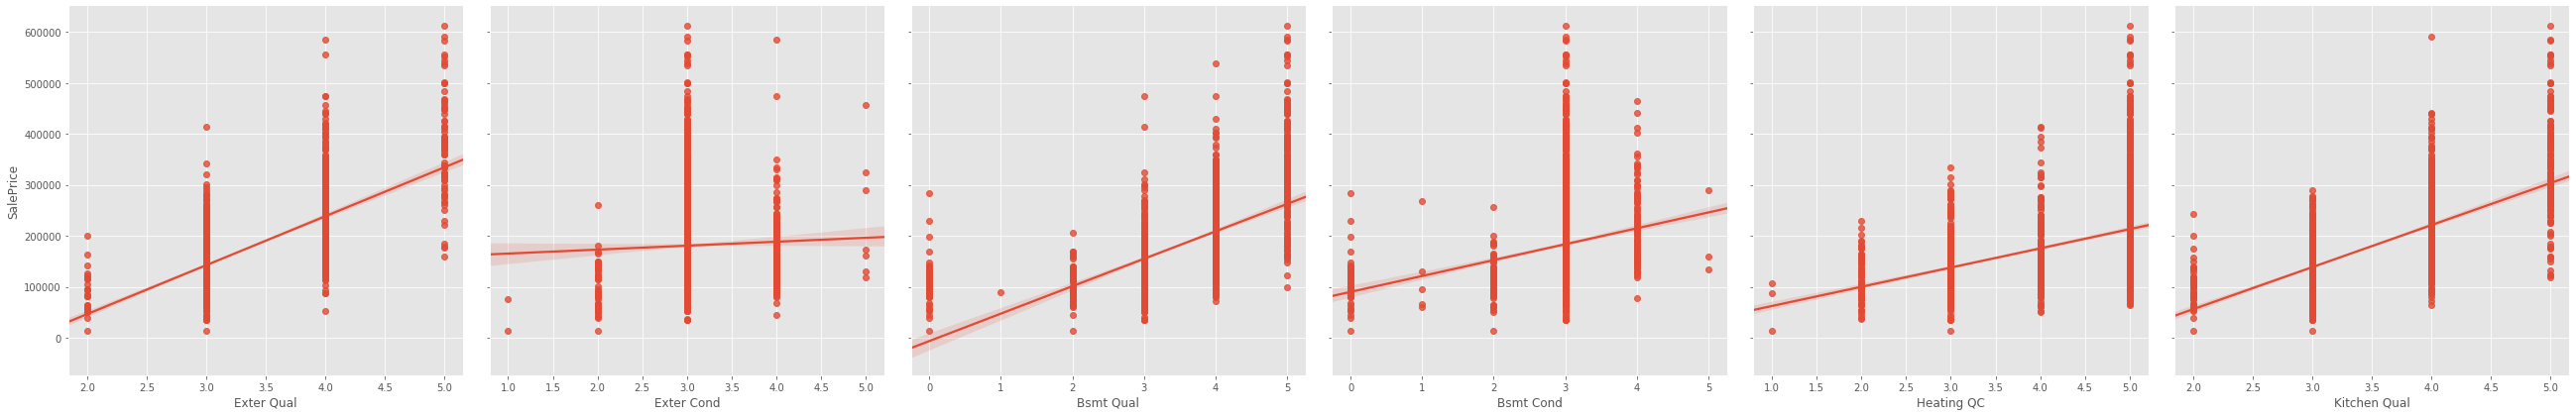

In [17]:
x_pars = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC','Kitchen Qual']

sns.pairplot(df4, x_vars=x_pars, y_vars=['SalePrice'], height=6, kind='reg');

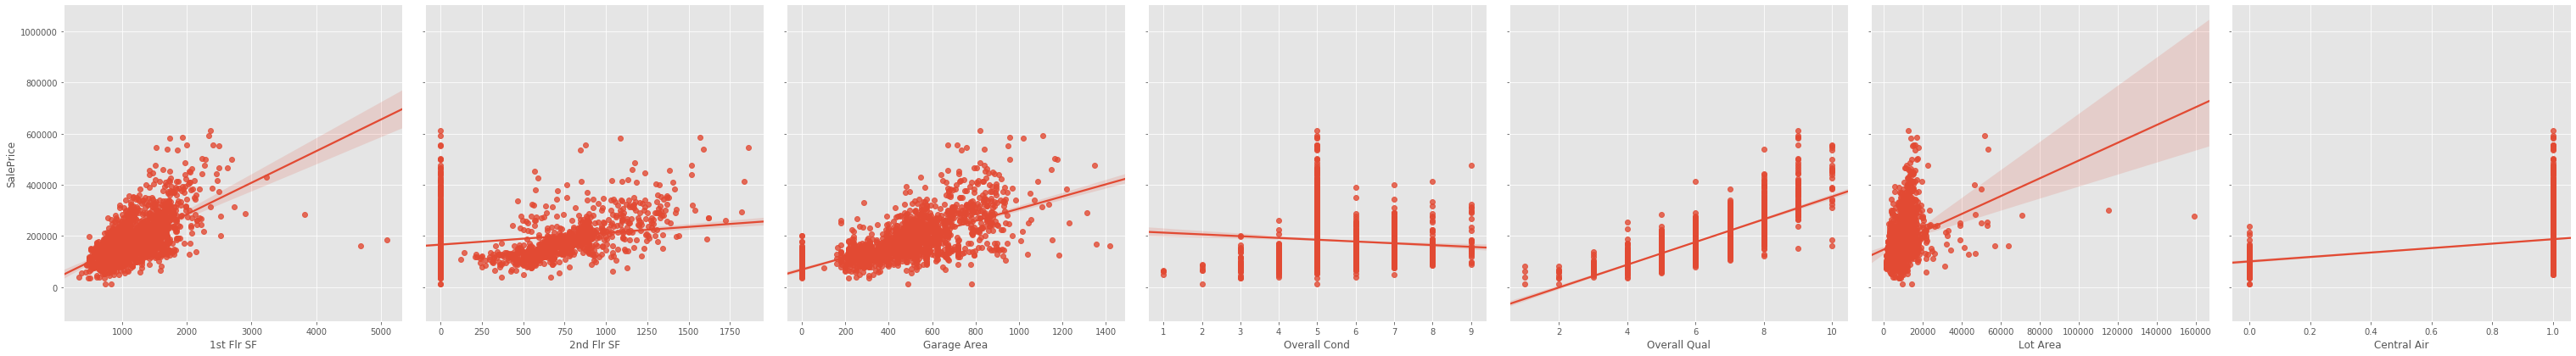

In [18]:
x_pars = ['1st Flr SF', '2nd Flr SF', 'Garage Area', 'Overall Cond', 'Overall Qual', 'Lot Area', 'Central Air']

sns.pairplot(df4, x_vars=x_pars, y_vars=['SalePrice'], height=6, kind='reg');

# Step 3: Feature Selection & Regression

[Back To Top](#Contents)

I'm now making sure I select the columns I want for my train test split, between my X & y, and instantiating a LinearRegression

In [19]:
reg_feat2 = ['Lot Area', 'Overall Qual', 'Overall Cond', 'Exter Qual',
       'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC', 'Central Air',
       '1st Flr SF', '2nd Flr SF', 'Fireplaces', 'Garage Type', 'Garage Area',
       'Total Bsmt SF', 'Gr Liv Area', 'Kitchen Qual', 'Alley_Grvl',
       'Alley_Pave', 'Street_Grvl', 'Street_Pave', 'Nghbrhd_Blueste',
       'Nghbrhd_BrDale', 'Nghbrhd_BrkSide', 'Nghbrhd_ClearCr',
       'Nghbrhd_CollgCr', 'Nghbrhd_Crawfor', 'Nghbrhd_Edwards',
       'Nghbrhd_Gilbert', 'Nghbrhd_Greens', 'Nghbrhd_GrnHill',
       'Nghbrhd_IDOTRR', 'Nghbrhd_Landmrk', 'Nghbrhd_MeadowV',
       'Nghbrhd_Mitchel', 'Nghbrhd_NAmes', 'Nghbrhd_NPkVill', 'Nghbrhd_NWAmes',
       'Nghbrhd_NoRidge', 'Nghbrhd_NridgHt', 'Nghbrhd_OldTown',
       'Nghbrhd_SWISU', 'Nghbrhd_Sawyer', 'Nghbrhd_SawyerW', 'Nghbrhd_Somerst',
       'Nghbrhd_StoneBr', 'Nghbrhd_Timber', 'Nghbrhd_Veenker']


In [20]:
X2 = df4[reg_feat2]
y2 = df4['SalePrice']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=42)

lr2 = LinearRegression()



In [21]:
cross_val_score(lr2, X_train2, y_train2, cv=5).mean()

0.8149556353518331

In [22]:
cross_val_score(lr2, X_test2, y_test2, cv=5).mean()

0.86549957622053

In [23]:
cross_val_score(lr2, X2, y2, cv=5).mean()

0.8418889419969021

In [24]:
lr2.fit(X_train2, y_train2);
lr2.score(X_train2, y_train2)

0.8439369350049616

In [25]:
lr2.score(X_test2, y_test2)

0.8708054729186921

In [26]:
lr2.fit(X2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 - Not a terrible score, was glad to see it improved on the testing data
 - Wanted to then see how the chart looks with my predicted values vs my actual values with my Linear Regression model!

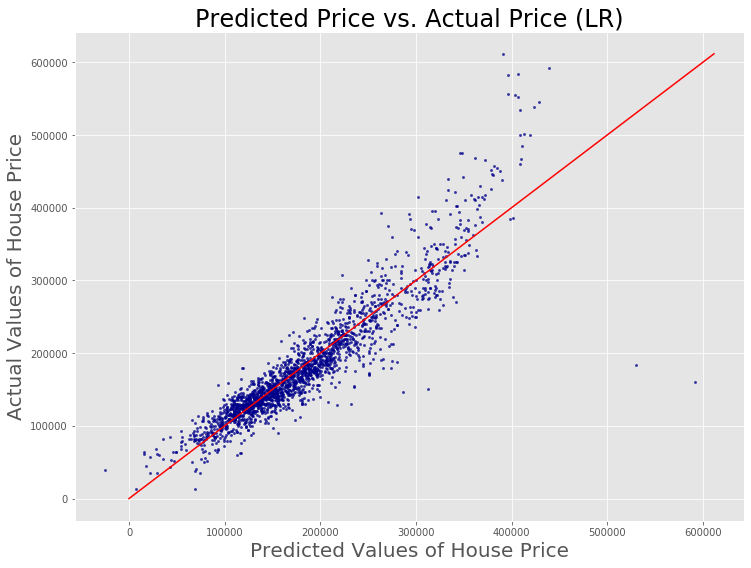

In [28]:
# Charting Predicted Price vs Actual Price PolyNomial
yg = df4['SalePrice']

y_pred_lr = lr2.predict(X2)

plt.style.use('ggplot')

plt.figure(figsize=(12,9))
plt.scatter(y_pred_lr, yg, s=5, color='darkblue', alpha=0.8)

plt.plot([0, np.max(yg)], [0, np.max(yg)], color = 'red')
plt.xlabel("Predicted Values of House Price", fontsize = 20)
plt.ylabel("Actual Values of House Price", fontsize = 20)
plt.title('Predicted Price vs. Actual Price (LR)', fontsize = 24);

# Step 4: Apply to Test Data

[Back To Top](#Contents)

- This was the LinearRegression Testing Dataset
- I loaded the data, and then wanted to apply all the same changes that I had applied to my training data, to the testing data that didn't have a `SalePrice` value

In [32]:
df_test = pd.read_csv('datasets/test.csv')
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [33]:
df_test2 = df_test[features3]
df_test2.head();

In [34]:
# Applying all the cleanup from the training set

# 0 - 5 Applications on these columns
df_test2['Exter Qual'] = df_test2['Exter Qual'].apply(qualityify)
df_test2['Exter Cond'] = df_test2['Exter Cond'].apply(qualityify)
df_test2['Bsmt Qual'] = df_test2['Bsmt Qual'].apply(qualityify)
df_test2['Bsmt Cond'] = df_test2['Bsmt Cond'].apply(qualityify)
df_test2['Heating QC'] = df_test2['Heating QC'].apply(qualityify)
df_test2['Kitchen Qual'] = df_test2['Kitchen Qual'].apply(qualityify)


# 0 - 2 Applications on this column
df_test2['Garage Type'] = df_test2['Garage Type'].apply(garage_adj)

# 0 - 1 Central Air
df_test2['Central Air'] = df_test2['Central Air'].map({'Y': 1, 'N': 0})

df_test2 = pd.get_dummies(df_test2, prefix='Alley', drop_first=False, dummy_na=False, columns=['Alley'])
df_test2 = pd.get_dummies(df_test2, prefix='Street', drop_first=False, dummy_na=False, columns=['Street'])
df_test2 = pd.get_dummies(df_test2, prefix='Nghbrhd', drop_first=True, columns=['Neighborhood'])


C:\Users\Rytas\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Rytas\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Rytas\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [35]:
df_test2.head()

,Lot Area,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Central Air,1st Flr SF,...,Nghbrhd_NoRidge,Nghbrhd_NridgHt,Nghbrhd_OldTown,Nghbrhd_SWISU,Nghbrhd_Sawyer,Nghbrhd_SawyerW,Nghbrhd_Somerst,Nghbrhd_StoneBr,Nghbrhd_Timber,Nghbrhd_Veenker
0,9142,6,8,3,2,2,3,4,0,908,...,0,0,1,0,0,0,0,0,0,0
1,9662,5,4,3,3,4,3,3,1,1967,...,0,0,0,0,1,0,0,0,0,0
2,17104,7,5,4,3,4,4,5,1,664,...,0,0,0,0,0,0,0,0,0,0
3,8520,5,6,4,3,3,3,3,1,968,...,0,0,1,0,0,0,0,0,0,0
4,9500,6,5,3,3,4,3,4,1,1394,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df_test2.isnull().sum().sum()

0

In [37]:
df_test2['Nghbrhd_GrnHill'] = 0
df_test2['Nghbrhd_Landmrk'] = 0

In [38]:
X_test = df_test2[reg_feat2]
df_test2['y_hat'] = lr2.predict(X_test)

In [39]:
df_test2[['Lot Area', 'y_hat']].head()

,Lot Area,y_hat
0,9142,131763.791965
1,9662,184603.193948
2,17104,194531.358990
3,8520,117172.441035
4,9500,184954.316563


In [40]:
new_sub = pd.read_csv('./datasets/sample_sub_reg.csv')

In [41]:
my_sub = pd.DataFrame(
{
    'Id': df_test['Id'],
    'Saleprice': df_test2['y_hat']
}
)

In [42]:
my_sub.head()

,Id,Saleprice
0,2658,131763.791965
1,2718,184603.193948
2,2414,194531.358990
3,1989,117172.441035
4,625,184954.316563


In [43]:
# This was my LinearRegression submission
my_sub.to_csv('./datasets/my better submission011620 II.csv', index=False)

> The above had a RSME of ~36,000 on Kaggle. Plenty of room to improve!

#### This was my best, final model method (Ridge, Pipe, GridSearch)

In [44]:
# Combination of class code created by Brendan McDonnell + help from classmate Sean Frey, 
# repurposed and edited to run with my model 
# Takes awhile to run

poly = PolynomialFeatures()
X_poly = poly.fit_transform(X2)
X_train_poly, X_test_poly, y_train3, y_test3 = train_test_split(X_poly, y2, random_state = 42)


pipe = Pipeline(
    [
            ('var_thresh', VarianceThreshold(0.05)),
            ('ss', StandardScaler()),
            ('kbest', SelectKBest(f_regression, k= 'all')),
            ('ridge', Ridge())
    ]
)

pipe_params = {
    'var_thresh__threshold': [0, 0.05, 0.1, 0.25],
    'ridge__alpha': np.logspace(0, 100, 100)
}
gs2 = GridSearchCV(pipe, pipe_params, cv = 5, verbose = 1)
gs2.fit(X_train_poly, y_train3);

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  2.6min finished


In [45]:
gs2.score(X_train_poly, y_train3)

0.9348898197391446

In [46]:
gs2.score(X_test_poly, y_test3)


0.9008922806429349

In [47]:
#This takes 1.75min to run!
gs2.fit(X_poly, y2);

X_test = df_test2[reg_feat2]
X_test_poly = poly.fit_transform(X_test)

df_test2['y_hat2'] = gs2.predict(X_test_poly)
df3 = pd.DataFrame({
    'Id': df_test['Id'],
    'SalePrice': df_test2['y_hat2']
})

df3.to_csv('./datasets/my better submission011620 IV.csv', index=False)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  3.6min finished


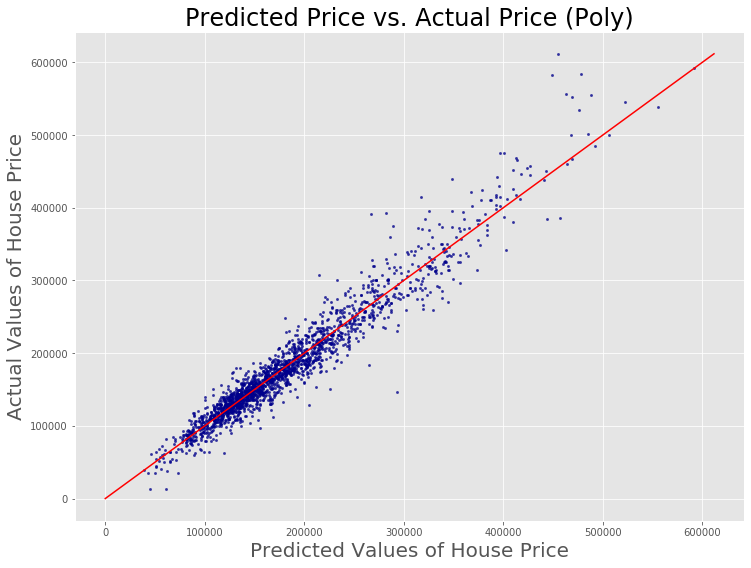

In [48]:
# Charting Predicted Price vs Actual Price PolyNomial
y = df4['SalePrice']

y_pred = gs2.predict(X_poly)

plt.style.use('ggplot')

plt.figure(figsize=(12,9))
plt.scatter(y_pred, y, s=5, color='darkblue', alpha=0.8)

plt.plot([0, np.max(y)], [0, np.max(y)], color = 'red')
plt.xlabel("Predicted Values of House Price", fontsize = 20)
plt.ylabel("Actual Values of House Price", fontsize = 20)
plt.title('Predicted Price vs. Actual Price (Poly)', fontsize = 24);

# Step 5: Conclusions and Recommendations

[Back To Top](#Contents)

- Creating quantitative columns out of `Kitchen Qual`, `Exter Qual`, `Exter Cond`, `Bsmt Qual`, `Bsmt Cond`, and `Heating QC` were definitely helpful in determining the house price.
- The Various SF measurements were some of the strongest indicators of the housing price. That is to say, `1st Flr SF`, `Garage Area`, `Bsmt Area`, and `Lot Area` were very important in tightening up the predicted house values
- My later model that runs a RidgeRegression does a better job predicting houses in the price range of 50,000 to 300,000 but both my models (LinearRegression & Ridge) tend to undervalue very expensive homes, and in general struggles to predict the home prices of the very high end houses.
- `Overall Qual` was the strongest standalone value in terms of correlation with a home. Intuitively it makes sense; the better quality the home, the more expensive it will be.

###### Some additional notes:

- I would want to look more into some additional values like `Porch` and `Pool QC`, as well as all the `Misc Features` since those items may aid in predicting very expensive homes
- I'd definitely want to look more into what effect dummy-ifying the `Neighborhood` value did to my model, and create/test some models that don't incorporate it at all. (With more time that is)
- There were other `Area` style measurements I would want to investigate
- `Beds` and `Baths` were omitted in my model, and I find that egregious and worthy of adding in and using to look into creating a better model potentially. 
- `Lot Shape`, `Housing Style`, `Roof Material`, `Year Built` are additional columns of data I think could impact that value of a home, and would test those on future models